<img style="float: left;" src="https://www.apachecollege.org/wp-content/uploads/2018/10/cropped-SCAC-logo-2014-1.png" width="175" height="175"><img style="float: right;" src="https://pbs.twimg.com/profile_images/1537109064093532160/mG03dW9G_400x400.jpg" width="175" height="175">


Welcome to the ESIIL-San Carlos Apache College Python Training. My name Nate Quarderer and I'm the Education Director at the Environmental Data Science Innovation & Inclusion Lab (ESIIL). Today I'm going to demonstrate for you some GIS + Earth Data Science (EDS) applications using Python.

In **Part 1 (Working with Spatial Data in Python)** we'll show you how to create maps using data from the U.S. Census Bureau, specifically **The American Indian/Alaska Native/Native Hawaiian (AIANNH) Areas Shapefile:** https://catalog.data.gov/dataset/tiger-line-shapefile-2020-nation-u-s-american-indian-alaska-native-native-hawaiian-aiannh-areas

In **Part 2 (Working with Time-Series Data in Python)** you will learn how to access data from the [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) at **NOAA**. We will then use those data to create a time-series plot of temperature or precipitation over time.

In **Part 3 (Create Interactive Maps with Folium)** you will learn how to create an interactive map of the San Carlos Apache Reservation using folium.

# Part 1: Working with Spatial Vector Data in Python

### About Spatial Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as vertices that define the “shape” of the spatial object. The organization of the vertices determines the type of vector that you are working with. There are three types of vector data:

**Points:** Each individual point is defined by a single x, y coordinate. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

**Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each “bend” in the road or stream represents a vertex that has defined x, y location.

**Polygons:** A polygon consists of 3 or more vertices that are connected and “closed”. Thus, the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons.


<img style="float: left;" src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png">


> ### ✨ Read more about working with spatial data using Python in our free, open EDS textbook, [here](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/). ✨


In [1]:
# Import Python packages
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium

In [2]:
# Land areas url
aiannh_url = "https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip"

# Open land area boundaries
aiannh_boundary = gpd.read_file(aiannh_url)
aiannh_boundary

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,5970,02418712,5970R,Miami/Peoria,Miami/Peoria joint-use OTSA,90,D0,R,F,G2170,S,32248315,439829,+36.9014538,-094.9203738,"POLYGON ((-94.96309 36.92137, -94.96292 36.922..."
855,5955,02418655,5955R,Kiowa-Comanche-Apache-Ft Sill Apache/Caddo-Wic...,Kiowa-Comanche-Apache-Ft Sill Apache/Caddo-Wic...,90,D0,R,F,G2170,S,499488940,1557225,+35.0575938,-098.3176096,"POLYGON ((-98.62080 35.04138, -98.62080 35.043..."
856,4910,02418987,4910R,Kickapoo (KS) Reservation/Sac and Fox Nation T...,Kickapoo (KS) Reservation/Sac and Fox Nation T...,83,D0,R,F,G2170,A,1060454,0,+39.7010141,-095.7209027,"POLYGON ((-95.72803 39.70401, -95.72803 39.704..."
857,4930,02419124,4930R,San Felipe Pueblo/Santa Ana Pueblo,San Felipe Pueblo/Santa Ana Pueblo joint-use area,83,D0,R,F,G2170,A,2785130,0,+35.3627291,-106.4945407,"POLYGON ((-106.51364 35.35993, -106.51318 35.3..."


    AIANNHCE  AIANNHNS  GEOID  \
0       2320  02419022  2320R   
1       9100  01930930  9100R   
2       4110  02419484  4110R   
3       1380  01666180  1380R   
4       1110  00806894  1110R   
..       ...       ...    ...   
854     5970  02418712  5970R   
855     5955  02418655  5955R   
856     4910  02418987  4910R   
857     4930  02419124  4930R   
858     4940  02419125  4940R   

                                                  NAME  \
0                                              Mohegan   
1                               Golden Hill Paugussett   
2                                       Table Mountain   
3                                           Greenville   
4                                             Flathead   
..                                                 ...   
854                                       Miami/Peoria   
855  Kiowa-Comanche-Apache-Ft Sill Apache/Caddo-Wic...   
856  Kickapoo (KS) Reservation/Sac and Fox Nation T...   
857                 San

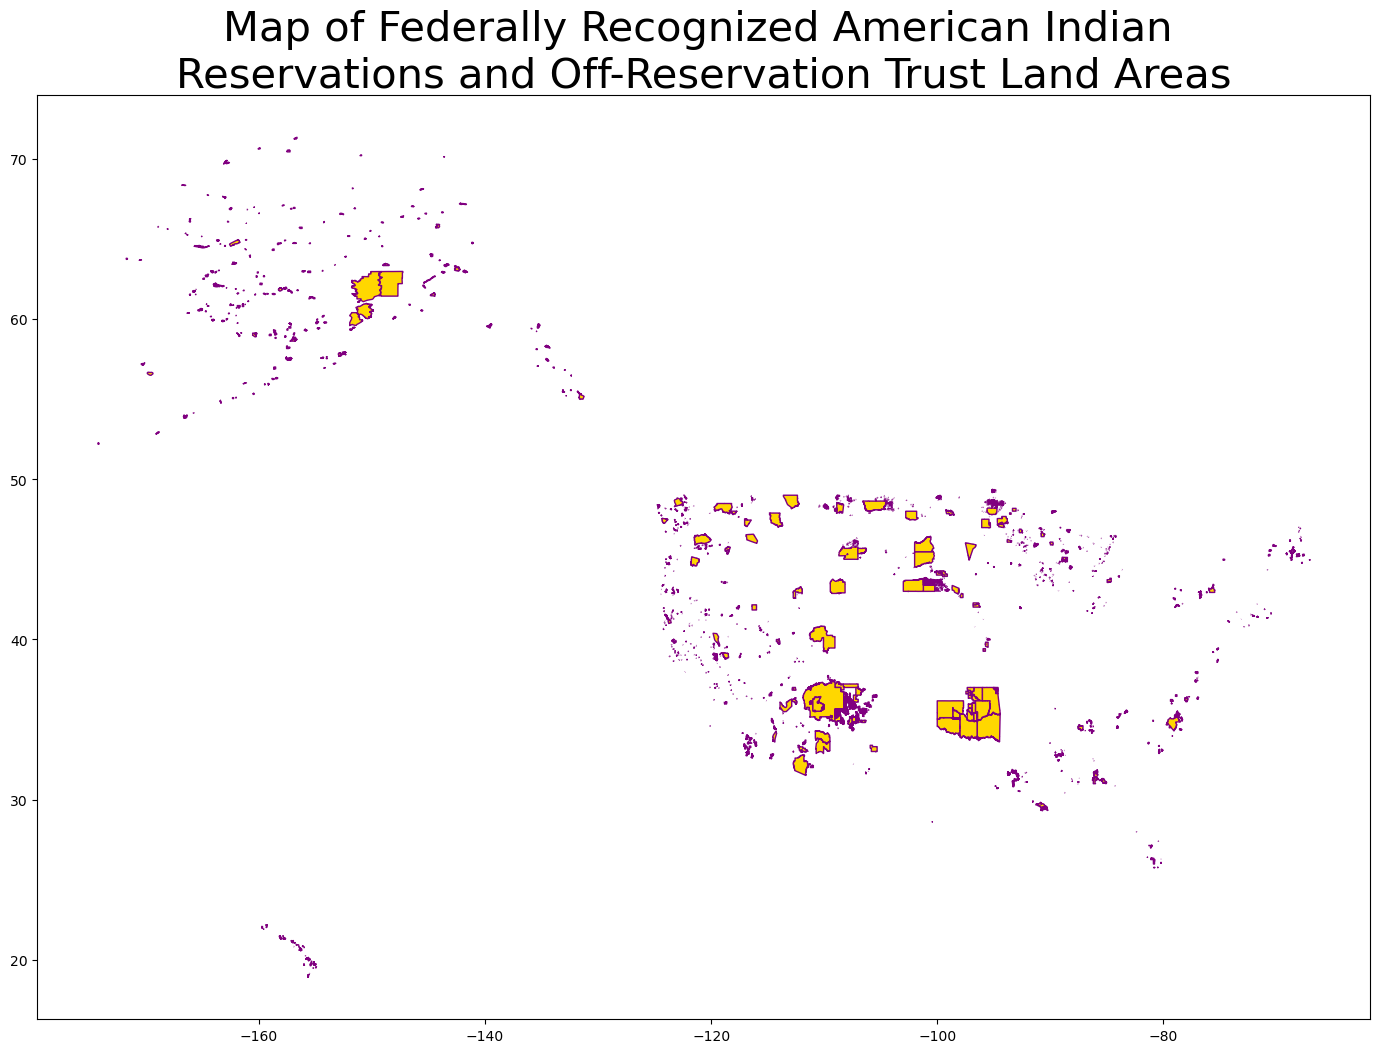

In [9]:
# Land areas url
aiannh_url = "https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip"

# Open land area boundaries
aiannh_boundary = gpd.read_file(aiannh_url)
print(aiannh_boundary)

# Plot land area boundaries
fig, ax = plt.subplots(figsize=(20,12))
aiannh_boundary.plot(color='gold',
                         edgecolor='purple',
                         ax=ax)
ax.set_title("Map of Federally Recognized American Indian \nReservations and Off-Reservation Trust Land Areas", fontsize=30)
plt.show()

In [2]:
# Open US State boundary
us_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"

us_gdf = gpd.read_file(us_url)
us_gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


The CRS of the AZ shapefile is: EPSG:4269


<Axes: >

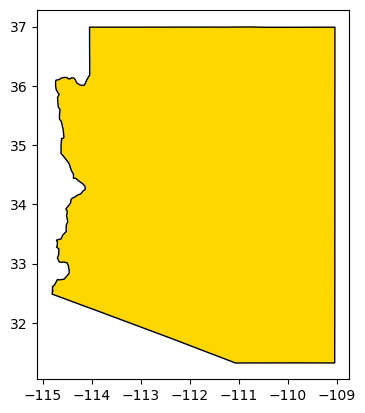

In [5]:
# Select AZ
az_bndry = us_gdf.loc[us_gdf['NAME'] == 'Arizona']

print("The CRS of the AZ shapefile is:", az_bndry.crs)
az_bndry.plot(color='gold',
                    edgecolor='black')

In [6]:
# Clip AIANNH boundary to AZ boundary
aiannh_az = aiannh_boundary.clip(az_bndry.geometry)
aiannh_az

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
94,4235,00032748,4235R,Tonto Apache,Tonto Apache Reservation,86,D8,R,F,G2101,A,391178,0,+34.2209433,-111.3283728,"POLYGON ((-111.33012 34.22114, -111.33012 34.2..."
274,0585,00255956,0585R,Chemehuevi,Chemehuevi Reservation,86,D2,R,F,G2101,A,124704707,0,+34.5406033,-114.4085278,"MULTIPOLYGON (((-114.41238 34.56778, -114.4123..."
125,4710,00036443,4710R,Yavapai-Prescott,Yavapai-Prescott Reservation,86,D2,R,F,G2101,A,5704646,0,+34.5506888,-112.4350383,"POLYGON ((-112.47610 34.56534, -112.47427 34.5..."
53,4708,00027214,4708R,Yavapai-Apache Nation,Yavapai-Apache Nation Reservation,86,D8,R,F,G2101,A,2631841,0,+34.6194418,-111.8953601,"MULTIPOLYGON (((-111.78289 34.64124, -111.7827..."
345,4708,00027214,4708T,Yavapai-Apache Nation,Yavapai-Apache Nation Off-Reservation Trust Land,OT,D5,T,F,G2102,A,4806080,0,+34.6306469,-111.9205600,"MULTIPOLYGON (((-111.86289 34.61395, -111.8599..."
372,1235,00024003,1235T,Fort Mojave,Fort Mojave Off-Reservation Trust Land,OT,D5,T,F,G2102,A,201955,11714,+34.8519398,-114.6158249,"POLYGON ((-114.61508 34.85386, -114.61493 34.8..."
250,4785,01934346,4785R,Zuni,Zuni Reservation,86,D8,R,F,G2101,A,1706156222,1981383,+35.0391281,-108.7470734,"MULTIPOLYGON (((-109.04600 34.87625, -109.0460..."
21,2680,02419049,2680R,Pascua Pueblo Yaqui,Pascua Pueblo Yaqui Reservation,86,D8,R,F,G2101,A,3621547,0,+32.1117152,-111.0821095,"POLYGON ((-111.09856 32.11169, -111.09830 32.1..."
330,2680,02419049,2680T,Pascua Pueblo Yaqui,Pascua Pueblo Yaqui Off-Reservation Trust Land,OT,D5,T,F,G2102,A,5441988,0,+32.1182894,-111.0783671,"MULTIPOLYGON (((-111.06322 32.11181, -111.0632..."
84,4200,00023763,4200R,Tohono O'odham Nation,Tohono O'odham Nation Reservation,86,D8,R,F,G2101,A,11534915770,883039,+32.1500358,-112.0704020,"MULTIPOLYGON (((-111.21716 32.10373, -111.2169..."


In [7]:
len(aiannh_az)


31

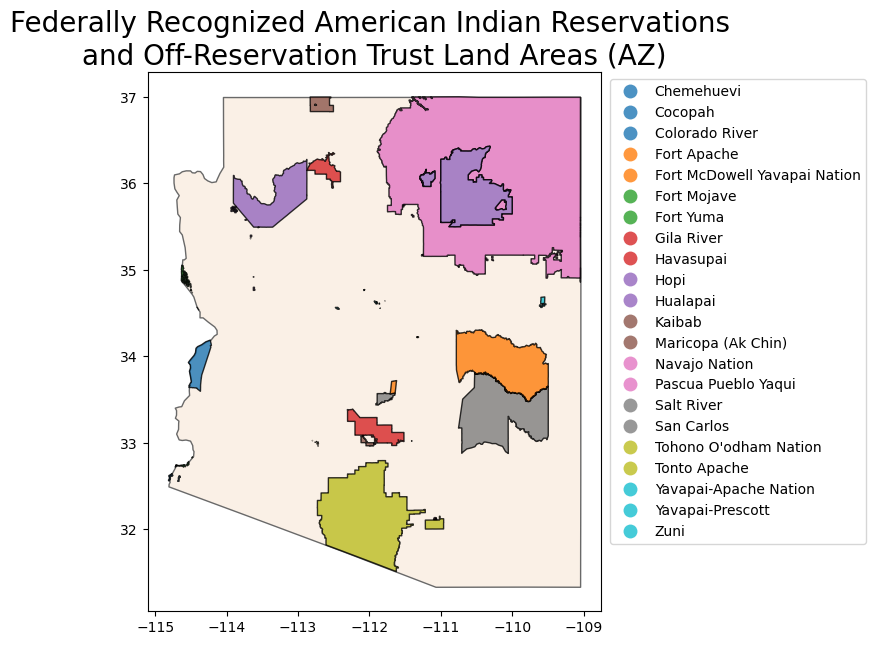

In [8]:
# Plot clipped AIANNH boundary
fig, ax = plt.subplots(figsize=(10,7))
az_bndry.plot(color='linen',
              edgecolor='dimgrey',
              ax=ax)


aiannh_az.plot(ax=ax,
               edgecolor='black',
               column='NAME',
               legend=True,
               alpha=0.8)

# Define and place legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.6, 1.0, 0., 0.))

plt.title("Federally Recognized American Indian Reservations \nand Off-Reservation Trust Land Areas (AZ)", fontsize=20)
plt.show()

In [9]:
# Select each reservation and plot separately
navajo_nation_bndry = aiannh_boundary.loc[aiannh_boundary['NAME'] == 'Navajo Nation']
san_carlos_bndry = aiannh_boundary.loc[aiannh_boundary['NAME'] == 'San Carlos']

<Axes: >

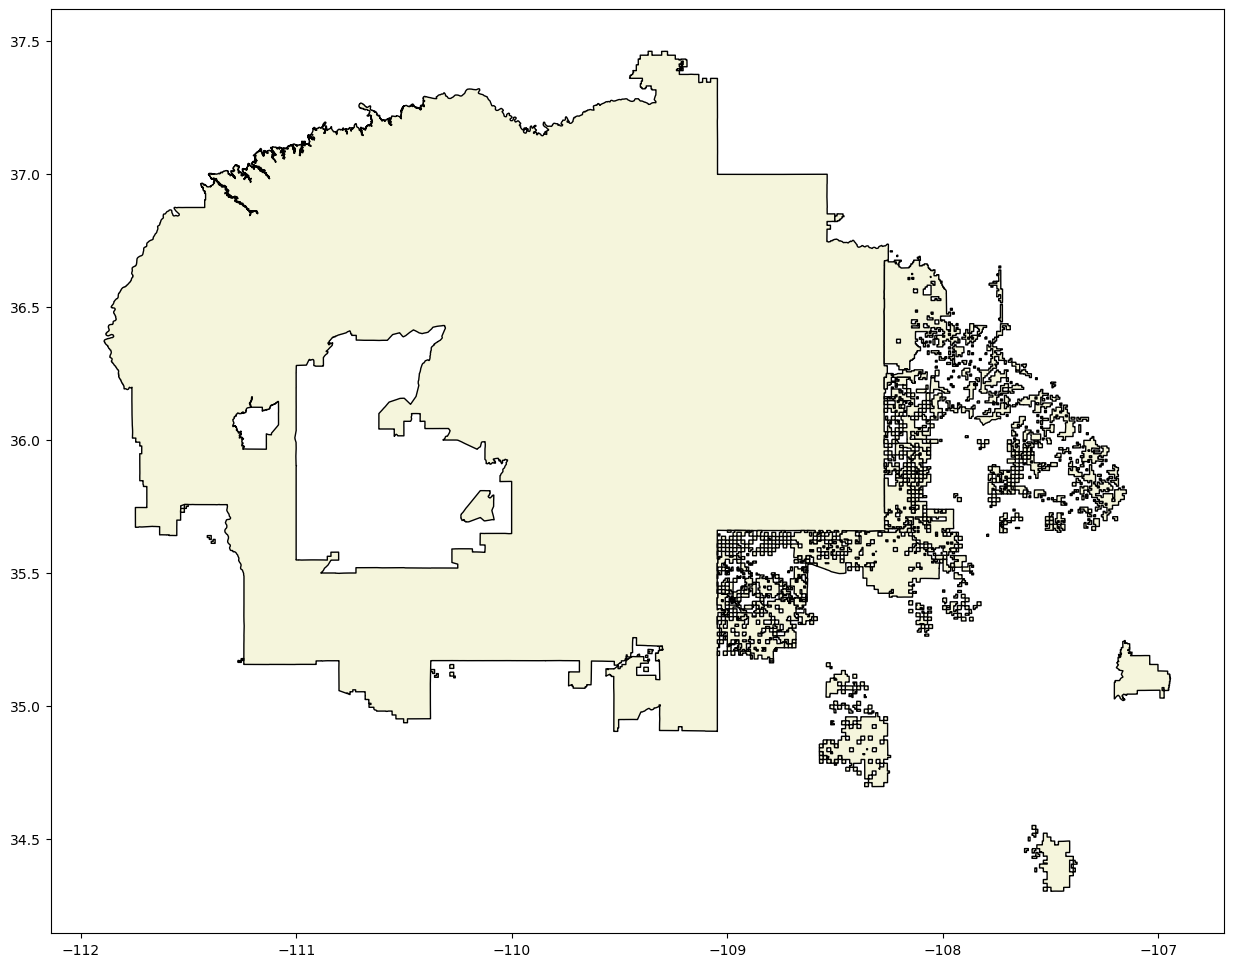

In [10]:
# Plot Navajo Nation
navajo_nation_bndry.plot(color='beige',
                         edgecolor='black',
                         figsize=(20,12))

<Axes: >

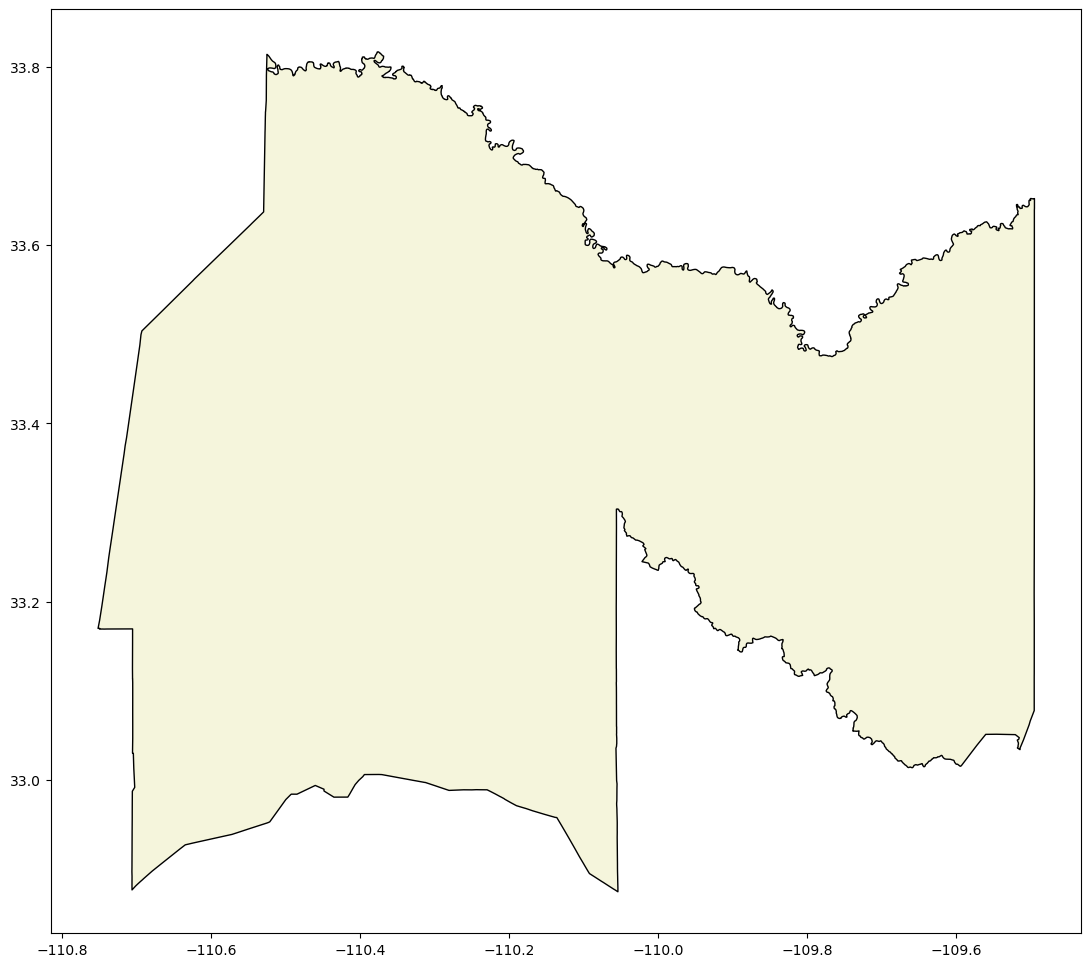

In [11]:
# Plot San Carlos
san_carlos_bndry.plot(color='beige',
                         edgecolor='black',
                         figsize=(20,12))

# Part 2: Working with Time-Series Data in Python

Here we're using the NOAA National Centers for Environmental Information (NCEI) [Access Data Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation) application progamming interface (API) to request data from their web servers. We will be using data collected as part of the [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) program at NOAA.

For this example we're requesting data near the **Black River** (station ID USC00020808) located on the San Carlos Reservation (**33.4783°, -109.7516°**).

https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00020808/detail


> ### ✨ Read more about working with time-series data using Python in our free, open EDS textbook, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/) ✨

In [12]:
# Use NCEI API to pull data from the station @ the Black River, AZ (San Carlos Apache)
black_river_api_url = (
           "https://www.ncei.noaa.gov/access/services/data/v1"
           "?dataset=daily-summaries&"
           "dataTypes=TAVG,TMAX,TMIN,PRCP&"
           "stations=USC00020808&"
           "startDate=1948-07-01&"
           "endDate=2023-10-01&"
           "includeStationName=true&"
           #"includeStationLocation=1&"
           "units=standard"
           )

In [13]:
# Open and clean data with pandas
black_river_df = pd.read_csv(black_river_api_url,
                              na_values=["-99"],
                              index_col=["DATE"],
                              parse_dates=["DATE"])
black_river_df

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1948-07-01,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,NaN,NaN
1948-07-02,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,NaN,NaN
1948-07-03,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,NaN,NaN
1948-07-04,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,NaN,NaN
1948-07-05,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-09-26,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,82.0,50.0
2023-09-27,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,85.0,47.0
2023-09-28,USC00020808,"BLACK RIVER PUMPS, AZ US",0.0,NaN,85.0,50.0


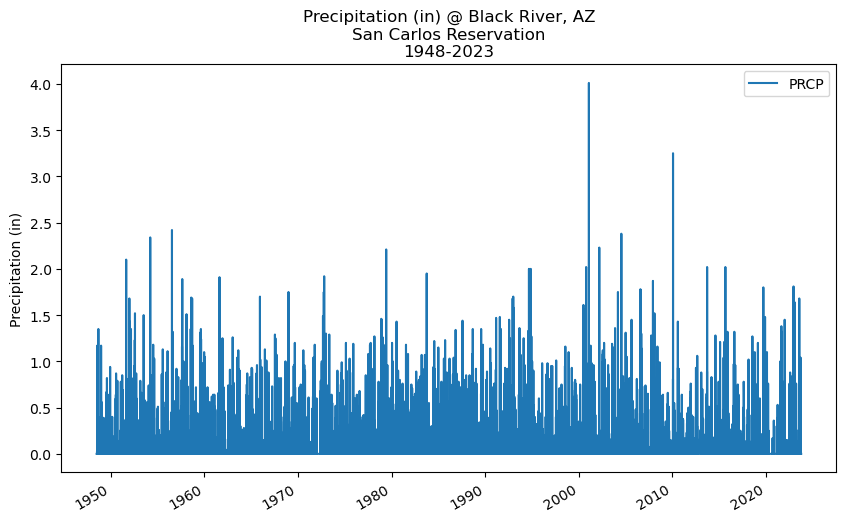

In [14]:
# Plot data with matplotlib
fig, ax = plt.subplots(figsize=(10,6))

black_river_df.plot(y='PRCP',
                 ax=ax,
                 ylabel='Precipitation (in)',
                 xlabel='',
                 title='Precipitation (in) @ Black River, AZ\nSan Carlos Reservation\n1948-2023')

plt.show()

# Part 3: Creating Interactive Maps using Folium
Here you will create an interactive map of the Black River USGS gage location and the San Carlos Apache Reservation using folium.




In [16]:
# Create interactive map using folium

# River gage info
gage_lat = 33.4783
gage_long = -109.7516
gage_location_name = 'River Gage - Black River'

# San Carlos Apache College info
scac_lat = 33.3522
scac_long = -110.4519
scac_loc_name = 'San Carlos Apache College'

# Create a Folium map object
m = folium.Map(location=[scac_lat,scac_long], zoom_start=15)

# Convert the GeoDataFrame to GeoJSON format
geojson_data = san_carlos_bndry.to_json()

# Add the GeoJSON data to the map as a GeoJson layer
folium.GeoJson(geojson_data).add_to(m)

# Add marker for river gage
folium.Marker(
    location=[gage_lat, gage_long],
    popup=gage_location_name,
    icon=folium.Icon(color='black')
).add_to(m)


# Add marker for San Carlos Apache College
folium.Marker(
    location=[scac_lat, scac_long],
    popup=scac_loc_name,
    icon=folium.Icon(color='purple')
).add_to(m)


# Save the map as an HTML file or display it inline
m.save('map.html')
# OR
m

In [3]:
mi_rds = 'https://www2.census.gov/geo/tiger/TIGER2019/PRISECROADS/tl_2019_26_prisecroads.zip'

mi_rds_gdf = gpd.read_file(mi_rds)
mi_rds_gdf

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1108315698488,I- 94 Bus Lp,I,S1200,"LINESTRING (-84.96340 42.27204, -84.96375 42.2..."
1,1105089475235,I- 69 Bus Lp,I,S1200,"LINESTRING (-84.50500 42.74102, -84.50586 42.7..."
2,1105089475238,I- 69 Bus Lp,I,S1200,"LINESTRING (-84.50500 42.74102, -84.50535 42.7..."
3,1109097221929,I- 69 Bus Lp,I,S1200,"LINESTRING (-84.42092 42.76968, -84.42291 42.7..."
4,1104485937305,I- 196 Bus Lp,I,S1200,"LINESTRING (-86.11679 42.76846, -86.11671 42.7..."
...,...,...,...,...,...
4847,11063985716,Cadillac Sq,M,S1200,"LINESTRING (-83.04622 42.33139, -83.04461 42.3..."
4848,11063947149,State Hwy 53,S,S1200,"LINESTRING (-83.01469 42.37882, -83.01499 42.3..."
4849,1106080928369,State Hwy 102,S,S1200,"LINESTRING (-82.93430 42.45029, -82.93364 42.4..."
4850,11064006231,Willow Run Expy,M,S1100,"LINESTRING (-83.44531 42.22075, -83.44616 42.2..."


The CRS of the MI shapefile is: EPSG:4269


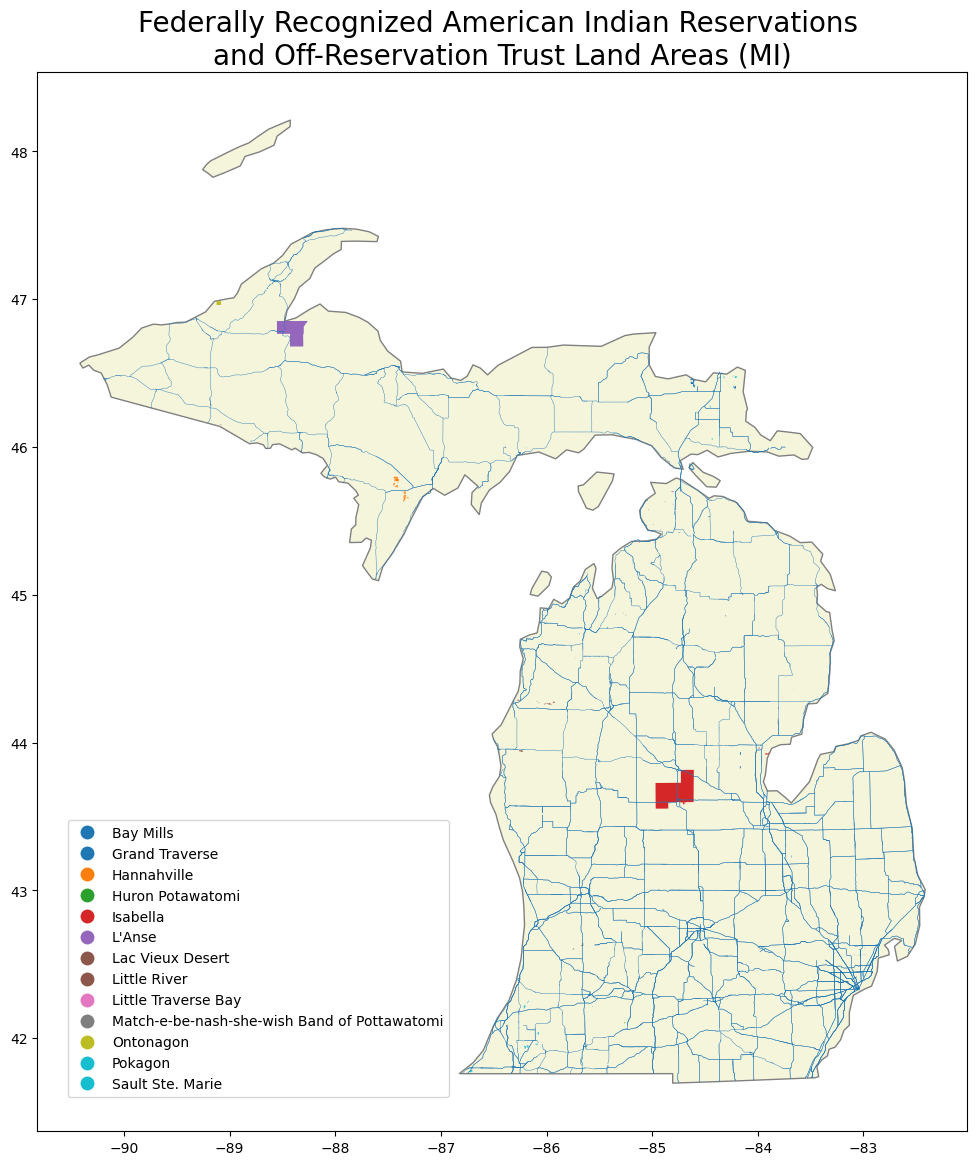

In [37]:
# Select MI
mi_bndry = us_gdf.loc[us_gdf['NAME'] == 'Michigan']

print("The CRS of the MI shapefile is:", mi_bndry.crs)


# Clip AIANNH boundary to MI boundary
aiannh_mi = aiannh_boundary.clip(mi_bndry.geometry)
aiannh_mi

fig, ax = plt.subplots(figsize=(12,20))
mi_bndry.plot(color='beige',
                    edgecolor='grey',
                    ax=ax)
mi_rds_gdf.plot(ax=ax, linewidth=0.3)

aiannh_mi.plot(ax=ax, linewidth=0.4,
               column='NAME',
               legend=True)

# Define and place legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.45, 0.3, 0., 0.))

plt.title("Federally Recognized American Indian Reservations \nand Off-Reservation Trust Land Areas (MI)", fontsize=20)
plt.show()